In [1]:
from fastai.vision.all import *

In [2]:
??URLs

In [3]:
path = untar_data(URLs.PASCAL_2007)

In [4]:
labels = pd.read_csv(path/'train.csv')

In [5]:
labels.tail()

,fname,labels,is_valid
5006,009954.jpg,horse person,True
5007,009955.jpg,boat,True
5008,009958.jpg,person bicycle,True
5009,009959.jpg,car,False
5010,009961.jpg,dog,False


In [6]:
def get_x(l): return path/'train'/l.fname
def get_y(l): return l.labels.split()

get_x(labels.iloc[~2]),get_y(labels.iloc[-3])

(Path('/storage/data/pascal_2007/train/009958.jpg'), ['person', 'bicycle'])

In [7]:
def my_col_splitter(df, col='is_valid'):
    return df.index[df[col]],df.index[~df[col]]

**Nope, you pass train_split first**

and you should do '.tolist()'

In [8]:
my_col_splitter(labels)

(Int64Index([   0,    1,    2,    4,    6,    7,    8,   10,   12,   18,
             ...
             4992, 4994, 4995, 4997, 5002, 5003, 5005, 5006, 5007, 5008],
            dtype='int64', length=2510),
 Int64Index([   3,    5,    9,   11,   13,   14,   15,   16,   17,   20,
             ...
             4991, 4993, 4996, 4998, 4999, 5000, 5001, 5004, 5009, 5010],
            dtype='int64', length=2501))

In [9]:
dblock = DataBlock(blocks=[ImageBlock, MultiCategoryBlock],
                  get_x=get_x, get_y=get_y,
                   splitter=my_col_splitter,
                  item_tfms=RandomResizedCrop(128))

In [10]:
dsets = dblock.datasets(labels)

In [11]:
dls = dblock.dataloaders(labels)

In [49]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy_multi])

SuggestedLRs(valley=0.002511886414140463)

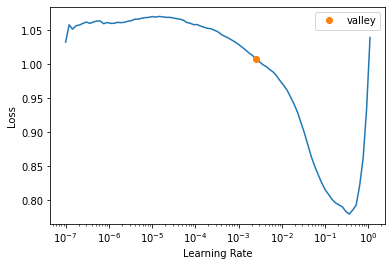

In [50]:
learn.lr_find()

In [51]:
learn.fit_one_cylce??

Object `learn.fit_one_cylce` not found.


In [52]:
learn.fine_tune(5, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.964170,0.698736,0.622091,00:24
1,0.841537,0.547260,0.744622,00:22
2,0.618344,0.216273,0.947661,00:23


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.261474,0.165527,0.955738,00:28
1,0.209338,0.126097,0.958577,00:27
2,0.167856,0.113325,0.961435,00:27
3,0.142185,0.107058,0.963455,00:27
4,0.125161,0.105637,0.963655,00:27


In [67]:
x, y = dls.one_batch()

In [69]:
m = learn.model.cpu()

In [75]:
x = x.cpu()

In [71]:
preds = learn.model(x)

In [13]:
def my_binary_cross_entropy(inputs, targs):
    inputs = inputs.sigmoid()
    return -torch.where(targs==1., inputs, 1-inputs).log().mean()

In [76]:
y = y.cpu()

In [77]:
my_binary_cross_entropy(preds, y)

TensorMultiCategory(0.0861, grad_fn=<AliasBackward0>)

In [14]:
def my_accuracy_multi(inputs, targs, thresh=0.5):
    inputs = inputs.sigmoid()
    return (torch.where(inputs>thresh, 1, 0) == targs).float().mean()

or convert with `targs.bool()` and compare with `inputs>thresh` directly

In [83]:
my_accuracy_multi(preds, y)

TensorMultiCategory(0.9703)

In [15]:
learn = cnn_learner(dls, resnet50, metrics=[my_accuracy_multi], loss_func=my_binary_cross_entropy)

SuggestedLRs(valley=0.0006918309954926372)

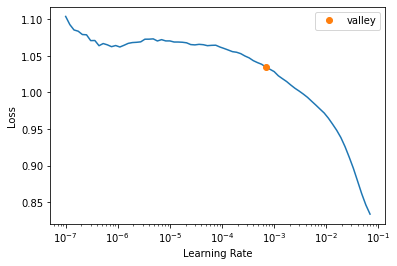

In [16]:
learn.lr_find()

In [17]:
learn.fine_tune(5, freeze_epochs=3)

epoch,train_loss,valid_loss,my_accuracy_multi,time
0,0.959780,0.698382,0.624010,00:34
1,0.840327,0.552520,0.737205,00:24
2,0.631077,0.230165,0.945282,00:23


epoch,train_loss,valid_loss,my_accuracy_multi,time
0,0.268764,0.167072,0.956937,00:29
1,0.209703,0.128973,0.958836,00:28
2,0.167973,0.111713,0.962115,00:28
3,0.141637,0.107400,0.963315,00:28
4,0.124549,0.105557,0.963814,00:28


In [20]:
import ipywidgets

In [22]:
upl = ipywidgets.FileUpload()

In [23]:
upl

FileUpload(value={}, description='Upload')

In [41]:
img = PILImage.create(upl.data[-1])

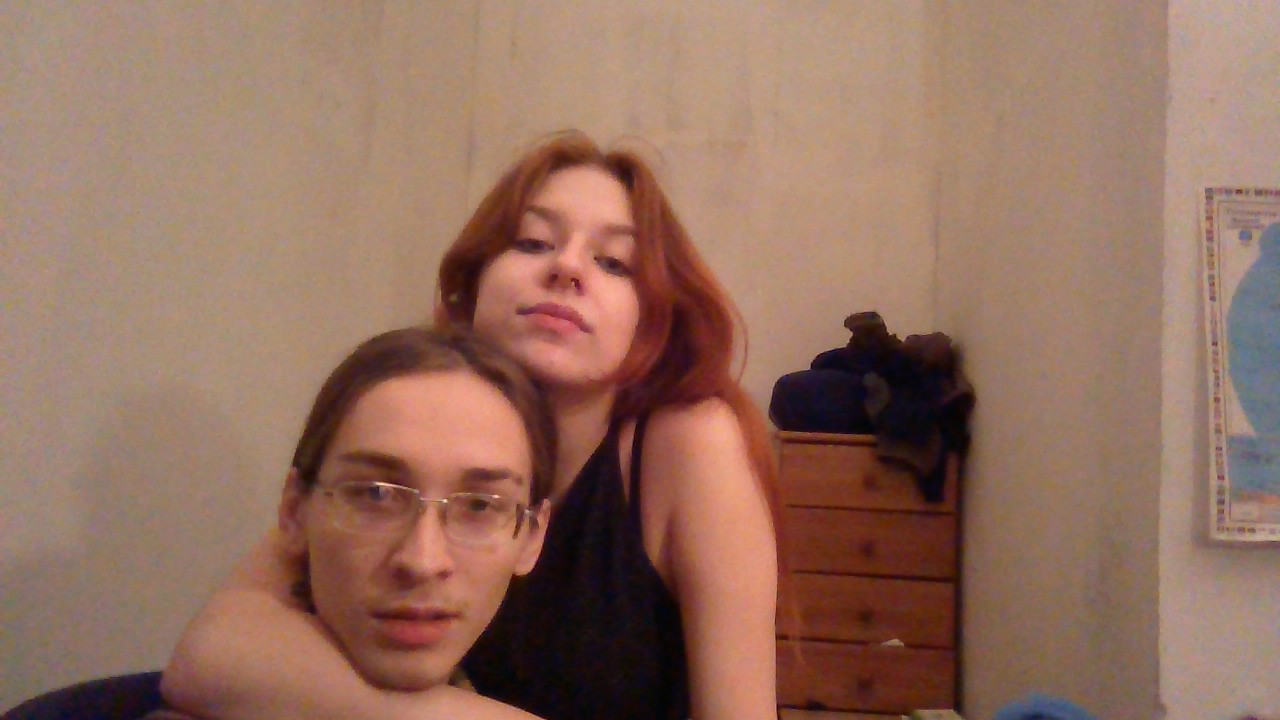

In [42]:
img

In [93]:
inp,_,probs,_ = learn.predict(img, with_input=1)

In [96]:
learn.dls.vocab[torch.where(probs.sigmoid()>0.5)[0]]

(#1) ['person']

<AxesSubplot:>

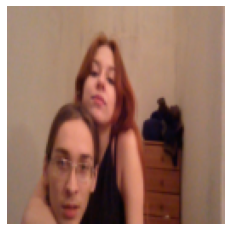

In [51]:
show_image(inp)

In [58]:
upl

FileUpload(value={'WIN_20211210_23_45_39_Pro.jpg': {'metadata': {'name': 'WIN_20211210_23_45_39_Pro.jpg', 'typ…

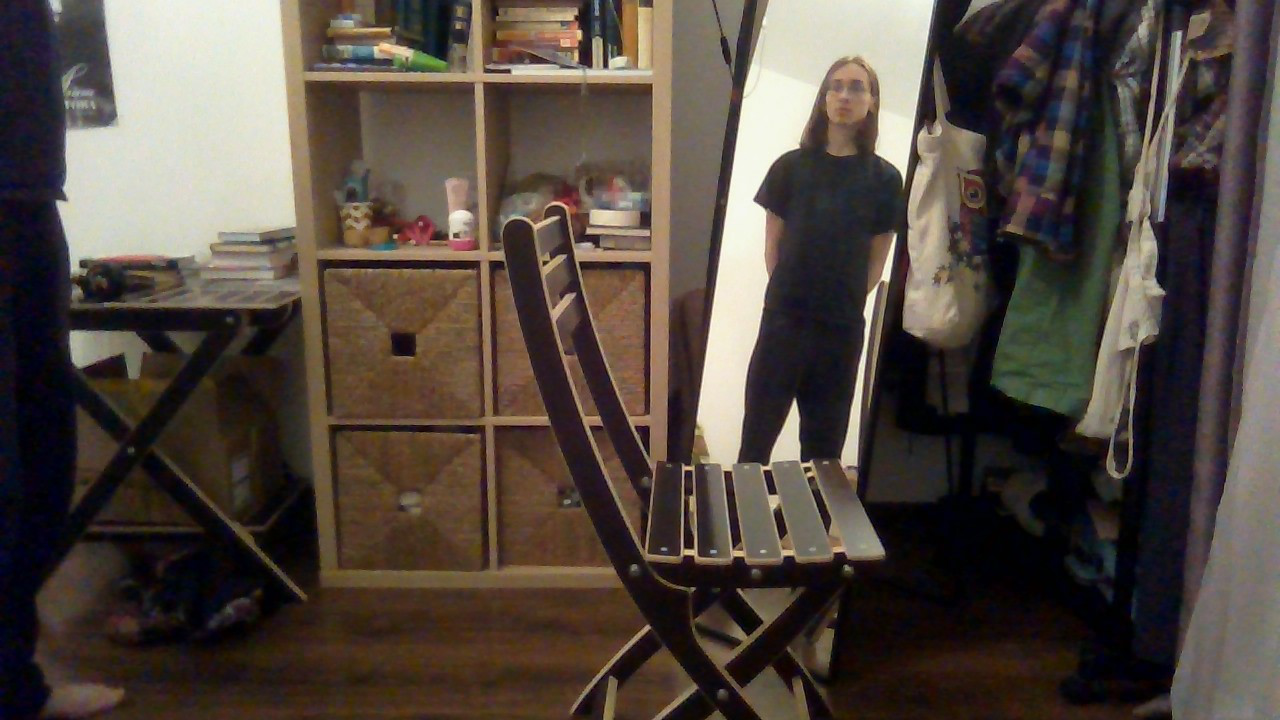

In [59]:
img2 = PILImage.create(upl.data[-1])
img2

In [98]:
inp,_,probs,_ = learn.predict(img2, with_input=1)

In [103]:
learn.dls.vocab[torch.where(probs.sigmoid()>0.1)[0]]

(#6) ['bicycle','chair','diningtable','pottedplant','train','tvmonitor']

<AxesSubplot:>

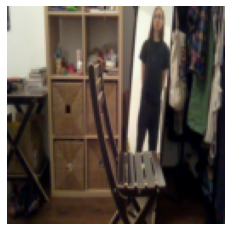

In [64]:
show_image(inp)